# Chapter 5 정규선형모델

# 5.1 연속형 독립변수가 하나인 모델 (단순회귀) 

5.1.1 분석 준비

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
#
# %cd /content/drive/MyDrive/Colab\ Notebooks/StatisticsWithPython/code/chap05

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

: 

5.1.2 데이터 읽어 들이기와 표시

In [2]:
beer = pd.read_csv("../../data/5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


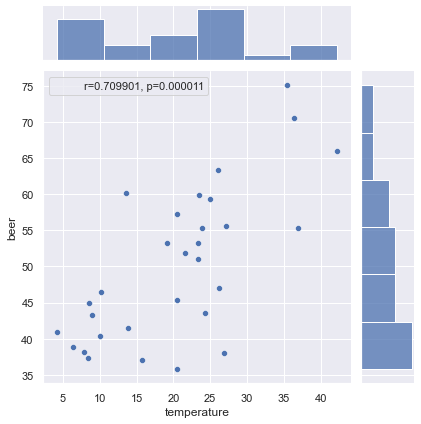

In [3]:
graph = sns.jointplot(x="temperature", y="beer", data=beer)

x = beer["temperature"]
y = beer["beer"]

r, p = stats.pearsonr(x, y)

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],[f'r={r:f}, p={p:f}'])

5.1.3 모델 구축

5.1.4 statsmodels를 이용한 모델링

In [4]:
lm_model = smf.ols(formula = "beer ~ temperature", data=beer).fit()

5.1.5 추정 결과 표시와 계수 검정

In [5]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           1.11e-05
Time:                        12:31:13   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      

5.1.6 summary 함수의 출력 내용 설명

5.1.7 AIC를 이용한 모델 선택

In [6]:
null_model = smf.ols("beer ~ 1", data=beer).fit()
print(f"null model AIC: {null_model.aic}")
print(f"lm model AIC  : {lm_model.aic}")

print(f"lm model LLF  : {lm_model.llf}")
print(f"lm model df   : {lm_model.df_model}")

print(f"lm model AIC (equation) : {-2 * (lm_model.llf - (lm_model.df_model + 1))}")

null model AIC: 227.94194972563105
lm model AIC  : 208.90902935575437
lm model LLF  : -102.45451467787719
lm model df   : 1.0
lm model AIC (equation) : 208.90902935575437


5.1.8 회귀직선

- 종속변수가 연속형 변수일 경우에는 전통적으로 회귀라고 부르기 때문에 회귀라는 이름을 사용했습니다.

5.1.9 seaborn을 이용한 회귀직선 그래프 그리기

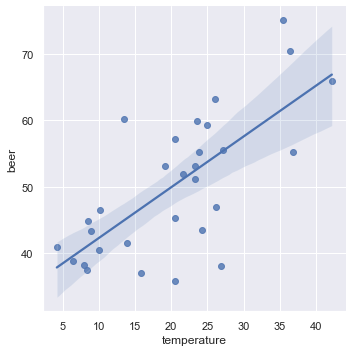

In [7]:
# TODO 회귀직선에서 신뢰구간이 가지는 의미
sns.lmplot(x="temperature", y="beer", data=beer)

5.1.10 모델을 이용한 예측

In [8]:
print(lm_model.predict())
print()

[50.3014808  53.74590495 42.26449113 55.20021737 46.70397114 37.82501112
 44.94348769 54.51133254 52.44467805 41.11634975 54.66441806 49.22988218
 53.21010564 52.44467805 41.03980699 52.59776357 45.24965873 61.78289462
 55.42984564 50.3014808  42.41757665 50.3014808  51.14345115 40.6570932
 66.91125946 52.9039346  62.85449324 41.42252079 62.47177945 39.50895182]



In [9]:
print("기온이 0도일 때의 맥주 매상")
print(lm_model.predict(pd.DataFrame({"temperature":[0]})))
print()

기온이 0도일 때의 맥주 매상
0    34.610215
dtype: float64



In [10]:
print("모델 파라미터")
print(lm_model.params)
print()

모델 파라미터
Intercept      34.610215
temperature     0.765428
dtype: float64



In [12]:
print("기온이 20도일 때의 맥주 매상")
print(lm_model.predict(pd.DataFrame({"temperature":[20]})))
print()

기온이 20도일 때의 맥주 매상
0    49.918767
dtype: float64



In [13]:
print("파라미터 확인")
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
print("기온이 20도일 때의 맥주 매상")
print(beta0 + beta1 * temperature)
print()

파라미터 확인
기온이 20도일 때의 맥주 매상
49.91876701095054



5.1.11 잔차 계산

- 정규선형모델의 경우에는 잔차가 '평균이 0인 정규분포'를 따르는 것이므로 모델이 그 분포를 따르고 있는지 체크하게 됩니다.

$$residuals = {y - {\hat{y}}}$$

In [14]:
resid = lm_model.resid
print(resid.head(3))

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64


In [15]:
y_hat = beta0 + beta1 * beer.temperature
print(y_hat.head(3))

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64


In [16]:
print("residual")
print((beer.beer - y_hat).head(3))

residual
0   -5.001481
1    5.554095
2   -1.864491
dtype: float64


5.1.12 결정계수

$$R^2 = {{\sum_{i=1}^N(\hat{y} - \mu)^2} \over {\sum_{i=1}^N(y - {\mu})^2}}$$

In [17]:
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

r_squared = np.sum((yhat - mu) ** 2) / np.sum((y - mu) ** 2)
print(f"r_squared (equation 01): {r_squared}")

r_squared (equation 01): 0.503959323061187


In [18]:
print(f"r_squared (lm_model): {lm_model.rsquared}")

r_squared (lm_model): 0.5039593230611856


In [19]:
print(np.sum((yhat - mu) ** 2) + sum(resid ** 2))

3277.114666666669


In [20]:
print(np.sum((y - mu) ** 2))

3277.1146666666655


$$R^2 = 1 - {{\sum_{i=1}^Nresiduals^2} \over {\sum_{i=1}^N(y - {\mu})^2}}$$

In [21]:
r_squared = 1 - np.sum(resid ** 2) / np.sum((y - mu) ** 2)
print(f"r_squared: (equation 02): {r_squared}")

r_squared: (equation 02): 0.5039593230611857


5.1.13 수정된 결정계수

- 독립변수의 수가 늘어나는 것에 대해 페널티를 적용한 **결정계수**를 수정된 결정계수라고 부릅니다.

$$R^2 = 1 - {{\sum_{i=1}^Nresiduals^2 / (N-s-1)} \over {\sum_{i=1}^N(y - {\mu})^2 / (N-1)}}$$

In [22]:
n = len(beer.beer)
s = 1
r_squared_adj = 1 - ((np.sum(resid ** 2)) / (n - s - 1)) / (np.sum((y - mu) ** 2) / (n - 1))
print(f"r_squared_adj (equation): {r_squared_adj}")

r_squared_adj (equation): 0.48624358459908523


In [23]:
print(f"r_squared_adj (lm_model): {lm_model.rsquared_adj}")

r_squared_adj (lm_model): 0.4862435845990851


5.1.14 잔차 그래프

<AxesSubplot:ylabel='Density'>

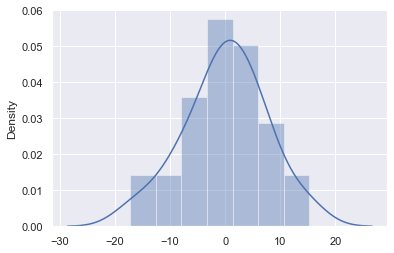

In [24]:
# sns.displot
sns.distplot(resid)

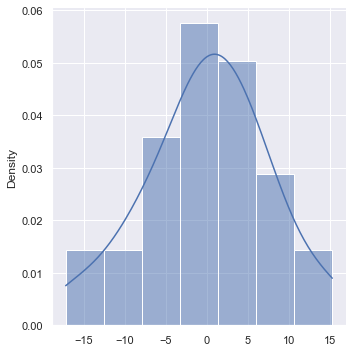

In [25]:
# sns.displot
sns.displot(resid, stat="density", kde=True)

<AxesSubplot:ylabel='Density'>

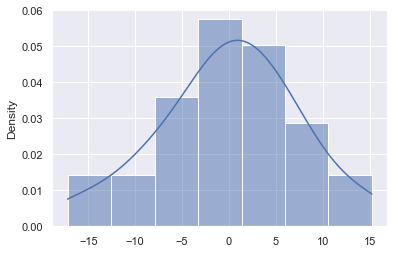

In [26]:
# sns.histplot
sns.histplot(resid, stat="density", kde=True)

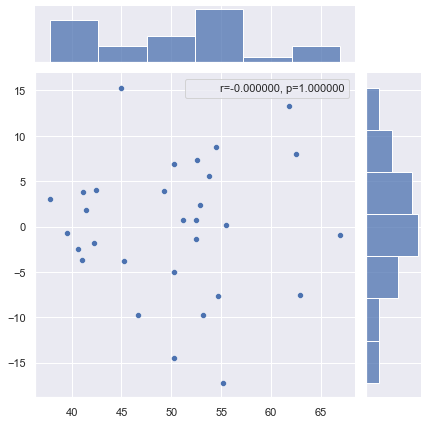

In [27]:
graph = sns.jointplot(lm_model.fittedvalues, resid)

r, p = stats.pearsonr(lm_model.fittedvalues, resid)

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],[f'r={r:f}, p={p:f}'])

5.1.15 Q-Q 플롯

- 이론상의 분위점과 실제 데이터의 분위점을 산포도 그래프로 그린 것을 **Q-Q 플롯**이라고 합니다.

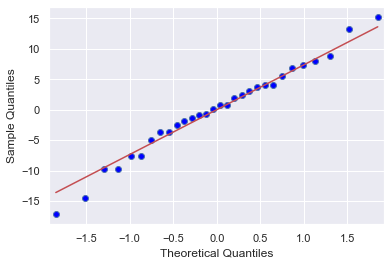

In [28]:
fig = sm.qqplot(resid, line="s")

In [29]:
resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [30]:
# 이번에는 Q-Q 플롯을 직접 만들어보겠습니다.
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
print(cdf)

[0.03225806 0.06451613 0.09677419 0.12903226 0.16129032 0.19354839
 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871 0.38709677
 0.41935484 0.4516129  0.48387097 0.51612903 0.5483871  0.58064516
 0.61290323 0.64516129 0.67741935 0.70967742 0.74193548 0.77419355
 0.80645161 0.83870968 0.87096774 0.90322581 0.93548387 0.96774194]


In [31]:
ppf = stats.norm.ppf(cdf)
print(ppf)

[-1.84859629 -1.51792916 -1.30015343 -1.13097761 -0.98916863 -0.86489436
 -0.75272879 -0.64932391 -0.55244258 -0.46049454 -0.37228936 -0.28689392
 -0.20354423 -0.12158738 -0.04044051  0.04044051  0.12158738  0.20354423
  0.28689392  0.37228936  0.46049454  0.55244258  0.64932391  0.75272879
  0.86489436  0.98916863  1.13097761  1.30015343  1.51792916  1.84859629]


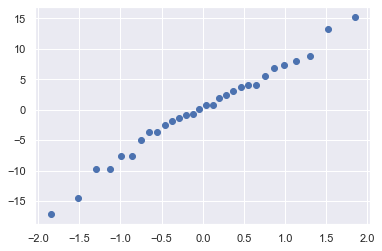

In [32]:
plt.plot(ppf, resid_sort, 'bo')

참고문헌: 

[1] 파이썬으로 배우는 통계학 교과서; 바바 신야 지음, 윤옹식 옮김; 한빛미디어 (2020)